In [0]:
# How to DESCRIBE Data and speak intelligently about a dataset:  
    # Week 1:  Setting up for writing code. 
    #   - Programming in R and Python environments 
    #   - Loading in data and summarizing it for insights

    # Week 2:  Building a predictive model
    #   - What is Regression?
    #   - Develop a model to predict the future of a time series 
    #   - Developing your first classification model

    # Week 3: Evaluating model performance
    #   - How to know what your model has learned
    #   - Deploy your model in a basic prediction app!

In [6]:
# Lets upload a data file
from google.colab import files
uploaded = files.upload()


Saving yahoo_close.csv to yahoo_close.csv


In [9]:
# Check what's in your virtual machine's file system now
ls

sample_data/  yahoo_close.csv


In [0]:
import pandas as pd
myData = pd.read_csv('yahoo_close.csv')


In [12]:
myData.head()

,year,month,week,monthweek,weekday,VIX.Close
0,2012,Jan,1,1,Tue,22.969999
1,2012,Jan,1,1,Wed,22.219999
2,2012,Jan,1,1,Thu,21.480000
3,2012,Jan,1,1,Fri,20.629999
4,2012,Jan,2,2,Mon,21.070000


In [57]:
myData.describe()

,year,week,monthweek,VIX.Close
count,1258.000000,1258.000000,1258.000000,1258.000000
mean,2014.003180,26.292528,2.941971,15.736685
std,1.413647,14.958344,1.293384,3.480582
min,2012.000000,0.000000,1.000000,10.320000
25%,2013.000000,13.000000,2.000000,13.310000
50%,2014.000000,26.000000,3.000000,14.775000
75%,2015.000000,39.000000,4.000000,17.237500
max,2016.000000,53.000000,5.000000,40.740002


In [0]:
myDataSubset = myData.loc[:, ['week', 'VIX.Close']]

In [14]:
myDataSubset.head()

,week,VIX.Close
0,1,22.969999
1,1,22.219999
2,1,21.480000
3,1,20.629999
4,2,21.070000


In [0]:
import matplotlib.pyplot as plt

In [65]:
! pip install mpld3

     |████████████████████████████████| 798kB 4.9MB/s 
  Stored in directory: /root/.cache/pip/wheels/c0/47/fb/8a64f89aecfe0059830479308ad42d62e898a3e3cefdf6ba28
Successfully built mpld3


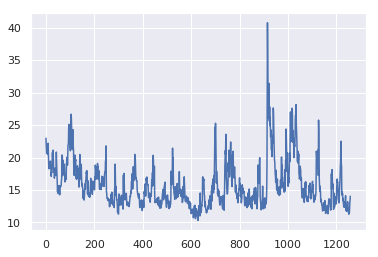

In [73]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()

plt.plot(myDataSubset['VIX.Close'])

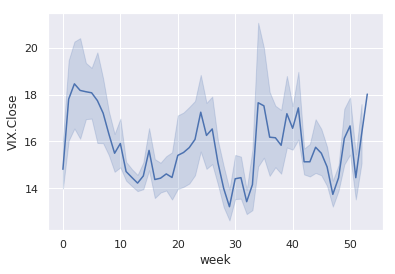

In [76]:
mpld3.disable_notebook()
import seaborn as sns; sns.set()
ax = sns.lineplot(x="week", y="VIX.Close", data=myDataSubset)

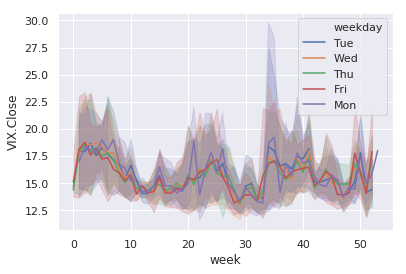

In [55]:
ax = sns.lineplot(x="week", y="VIX.Close", hue="weekday", data=myData)

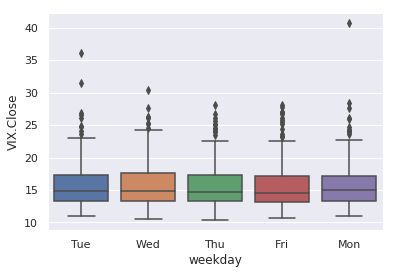

In [77]:
ax = sns.boxplot(x="weekday", y="VIX.Close", data=myData)

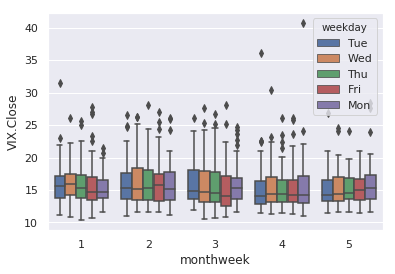

In [78]:
ax = sns.boxplot(x="monthweek", y="VIX.Close", hue="weekday", data=myData)

In [36]:
myDataSubset['VIX.Close'].min()

10.32

In [0]:
# myDataSubset['VIX.Manipulated01'] = ( myDataSubset['VIX.Close'] - myDataSubset['VIX.Close'].iloc[0] ) * 1.5
myDataSubset['VIX.Manipulated01'] = ( myDataSubset['VIX.Close'] - myDataSubset['VIX.Close'].min() ) / ( myDataSubset['VIX.Close'].max() - myDataSubset['VIX.Close'].min() )
myDataSubset.to_csv('myDataSubset.csv')

In [0]:
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [0]:
# In case you want to use Python and R together, we can use R magic for some cells.

In [46]:
# Activate R magic
%load_ext rpy2.ipython


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [47]:
# Then, whenever you want to use R, you begin the cell with %%R
%%R
x <- 42
print(x)

[1] 42


In [40]:
%%R
library(readr)
myDataSubset = read.csv('myDataSubset.csv')
head(myDataSubset)

print(summary(myDataSubset))

       X               week         VIX.Close     VIX.Manipulated01
 Min.   :   0.0   Min.   : 0.00   Min.   :10.32   Min.   :0.00000  
 1st Qu.: 314.2   1st Qu.:13.00   1st Qu.:13.31   1st Qu.:0.09829  
 Median : 628.5   Median :26.00   Median :14.78   Median :0.14645  
 Mean   : 628.5   Mean   :26.29   Mean   :15.74   Mean   :0.17806  
 3rd Qu.: 942.8   3rd Qu.:39.00   3rd Qu.:17.24   3rd Qu.:0.22740  
 Max.   :1257.0   Max.   :53.00   Max.   :40.74   Max.   :1.00000  


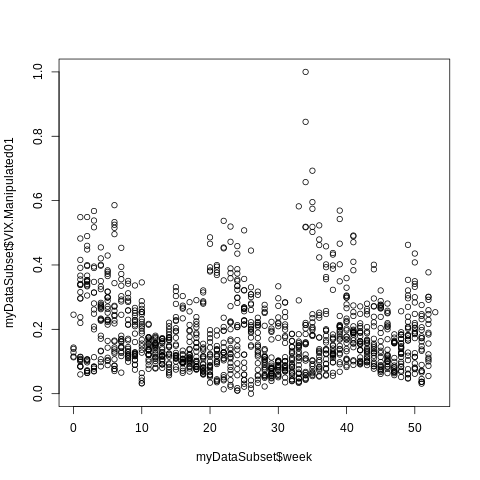

In [42]:
%%R
plot(myDataSubset$week, myDataSubset$VIX.Manipulated01) 

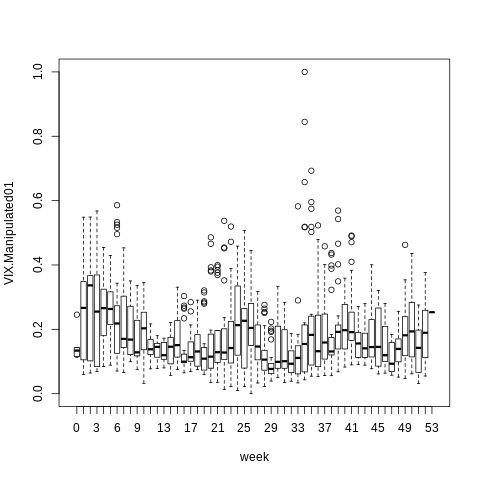

In [44]:
%%R
boxplot(VIX.Manipulated01 ~ week, data = myDataSubset) 

In [0]:
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

  align choice  time  coherence  firing_rate
0  dots     T1   -80        0.0    33.189967
1  dots     T1   -80        3.2    31.691726
2  dots     T1   -80        6.4    34.279840
3  dots     T1   -80       12.8    32.631874
4  dots     T1   -80       25.6    35.060487


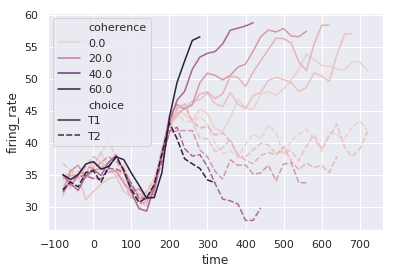

In [48]:
## More descriptive plots:

dots = sns.load_dataset("dots").query("align == 'dots'")
print(dots.head())

ax = sns.lineplot(x="time", y="firing_rate",
                   hue="coherence", style="choice",
                   data=dots)